In [5]:
import os
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import ParameterGrid
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import wget

import seaborn as sns

In [2]:
def load_data_(indir,fname,ftpurl=None,ftpdir=None,):
    """Load data in the file fname from the the indir.
    If ftpurl and ftpdir are set, first download the data from the ftp url"""
    if ftpurl:
        # Save the existing file
        if os.path.isfile(os.path.join(indir,fname)):
            os.rename(os.path.join(indir,fname),os.path.join(indir,fname+'.save'))
        assert ftpdir, 'if ftpurl is set, the argument ftpdir has to be set'
        full_url = os.path.join(ftpurl,ftpdir,fname)
        print(full_url)
        wget.download(full_url,out=indir)
    data = np.load(os.path.join(indir,fname))
    return data

def load_data(filename, ftpurl, ftpdir, localdir='.'):
    """Load data only if the data does not exist"""
    if os.path.isfile(filename):
        ftpurl = None
        ftpdir = None
    else:
        print('download data on ftp') 

    return load_data_(localdir,filename,ftpurl=ftpurl,ftpdir=ftpdir)

In [6]:
fname_da = 'results-EnKF_N-p56-std0.1-dtObs10-T200000.0-stdm0.001-foce49.npz'
fname_train = 'train-da-p56-std0.1-dtObs10-T200000.0-stdm0.001-foce49-train-mua-filTrue.npz'

ftpurl = 'ftp://ftp.nersc.no/reddaml/'
ftpdir = 'share'

data_da = load_data(fname_da,ftpurl=ftpurl,ftpdir=ftpdir)
data_train = load_data(fname_train,ftpurl=ftpurl,ftpdir=ftpdir)


download data on ftp
ftp://ftp.nersc.no/reddaml/share/results-EnKF_N-p56-std0.1-dtObs10-T200000.0-stdm0.001-foce49.npz
download data on ftp
ftp://ftp.nersc.no/reddaml/share/train-da-p56-std0.1-dtObs10-T200000.0-stdm0.001-foce49-train-mua-filTrue.npz


In [8]:
lvar2plot = [(21,'psio2',r'$\Psi_{o,2}$'),(29,'thetao2',r'$\theta_{o,2}$'),(0,'psia1',r'$\Psi_{a,1}$')]
#Mask for 36 variables
ivar36 = [
	 0,  1,  2,  3,  4,  5, 12, 13, 14, 15, #psi
	20, 21, 22, 23, 24, 25, 32, 33, 34, 35, #theta
	40, 41, 42, 43, 44, 45, 46, 47, #A
	48, 49, 50, 51, 52, 53, 54, 55 #T
]

ioce36 = np.arange(20,36)
iatm36 = np.arange(0,20)
nfeat = len(lvar2plot)

burn = 50

## Visualize effect of smoothing

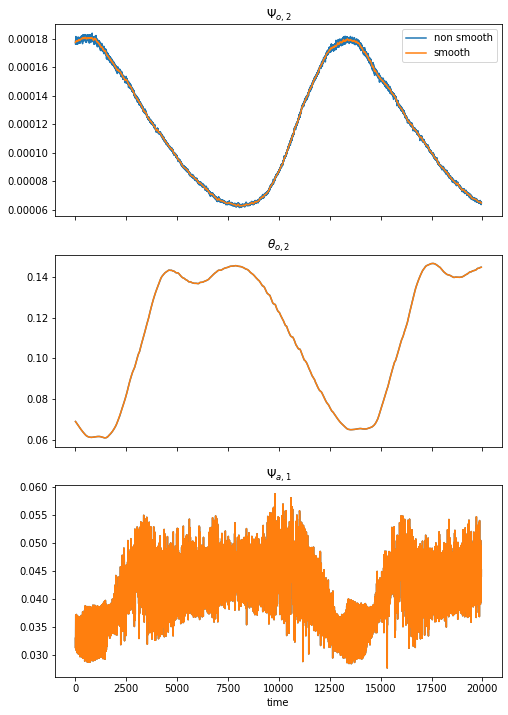

In [9]:
xx_da = data_da['mua'][burn:-1]
xx_train = data_train['x']
yy_train = data_train['y']

fig, ax = plt.subplots(nrows=nfeat,figsize=(8,4*nfeat),sharex='all')


for i, (ivar, var, name) in enumerate(lvar2plot):
    ax[i].plot(xx_da[:,ivar],label='non smooth')
    ax[i].plot(xx_train[:,ivar], label='smooth')
    ax[i].set_title(name)

ax[-1].set_xlabel('time');
ax[0].legend();


A zoom

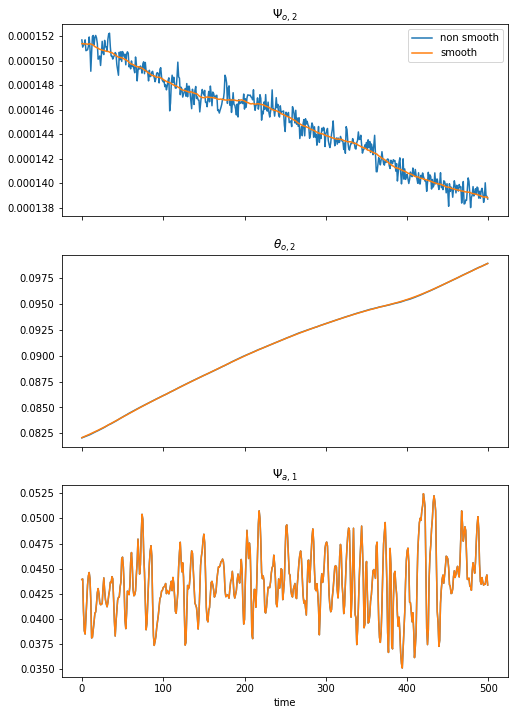

In [30]:
xx_da = data_da['mua'][burn:-1]
xx_train = data_train['x']
fig, ax = plt.subplots(nrows=nfeat,figsize=(8,4*nfeat),sharex='all')


for i, (ivar, var, name) in enumerate(lvar2plot):
    ax[i].plot(xx_da[2500:3000,ivar],label='non smooth')
    ax[i].plot(xx_train[2500:3000,ivar], label='smooth')
    ax[i].set_title(name)

ax[-1].set_xlabel('time');
ax[0].legend();

## Time series of the model error

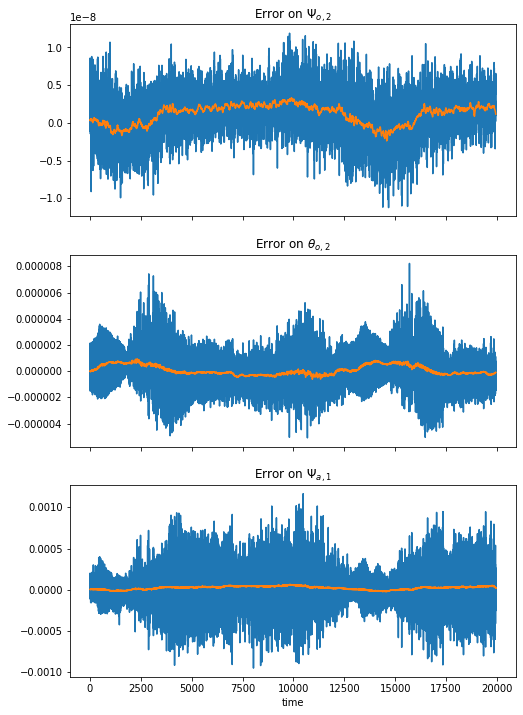

In [32]:
fig, ax = plt.subplots(nrows=nfeat,figsize=(8,4*nfeat),sharex='all')

#For smoothing:
kernel_size = 200
kernel = np.ones(kernel_size) / kernel_size

for i, (ivar, var, name) in enumerate(lvar2plot):
    ax[i].plot(yy_train[:,ivar])
    ax[i].set_title(f'Error on {name}')

    data_convolved = np.convolve(yy_train[:,ivar], kernel, mode='same')
    ax[i].plot(data_convolved)
ax[-1].set_xlabel('time');

/Home/julaja/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Home/julaja/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)
/Home/julaja/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)
/Home/julaja/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:218: Matpl

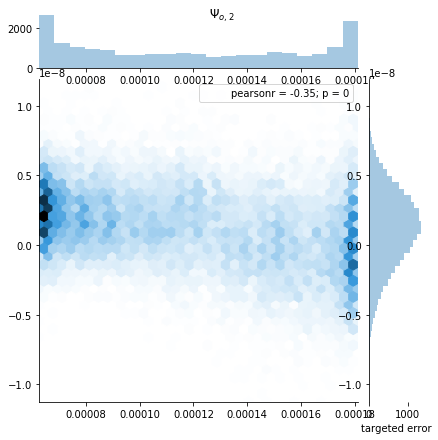

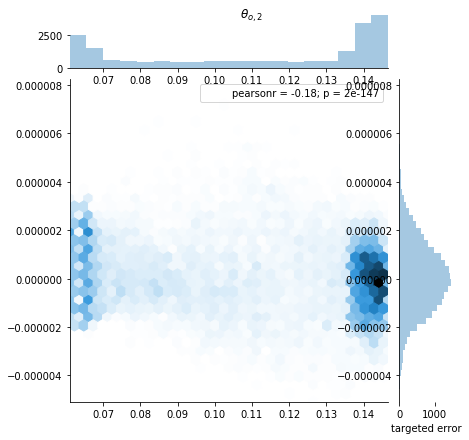

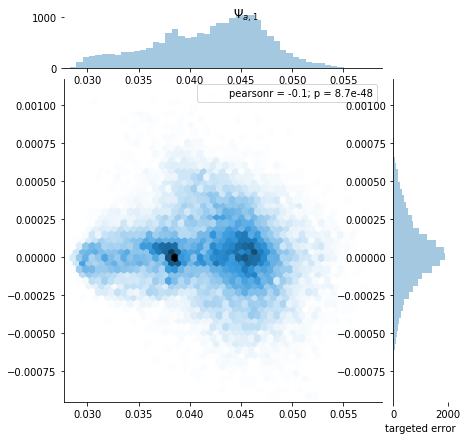

In [34]:
for i, (ivar, var, name) in enumerate(lvar2plot):
    sns.jointplot(x=xx_train[:,ivar], y=yy_train[:,ivar],
              kind='hex')
    plt.xlabel('Predictor')
    plt.xlabel('targeted error')
    plt.suptitle(name)